Part 1: Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


Part 2: Loading Data

In [2]:
def load_data(file_path):
    """Load data from a TSV file into a pandas DataFrame."""
    return pd.read_csv(file_path, delimiter='\t')

df = load_data('Sentiment140.tenPercent.sample.tweets.tsv')
print(df.head())


   sentiment_label                                         tweet_text
0                4  @elephantbird Hey dear, Happy Friday to You  A...
1                4  Ughhh layin downnnn    Waiting for zeina to co...
2                0  @greeniebach I reckon he'll play, even if he's...
3                0              @vaLewee I know!  Saw it on the news!
4                0  very sad that http://www.fabchannel.com/ has c...


Part 3: Splitting Data

In [3]:
def split_data(df):
    """Split data into training and testing sets."""
    return train_test_split(df['tweet_text'], df['sentiment_label'], test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = split_data(df)


Part 4: Transforming Data

In [4]:
def transform_data(X_train, X_test):
    """Transform text data into numerical vectors using TF-IDF and Bag of Words."""
    tfidf_vectorizer = TfidfVectorizer()
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    bow_vectorizer = CountVectorizer()
    X_train_bow = bow_vectorizer.fit_transform(X_train)
    X_test_bow = bow_vectorizer.transform(X_test)

    return X_train_tfidf, X_test_tfidf, X_train_bow, X_test_bow

X_train_tfidf, X_test_tfidf, X_train_bow, X_test_bow = transform_data(X_train, X_test)


Part 5: Training Models

In [5]:
def train_models(X_train_tfidf, y_train, X_train_bow):
    """Train Logistic Regression and Naive Bayes models."""
    lr_model = LogisticRegression()
    lr_model.fit(X_train_tfidf, y_train)

    nb_model = MultinomialNB()
    nb_model.fit(X_train_bow, y_train)

    return lr_model, nb_model

lr_model, nb_model = train_models(X_train_tfidf, y_train, X_train_bow)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Part 6: Making Predictions

In [6]:
def make_predictions(lr_model, nb_model, X_test_tfidf, X_test_bow):
    """Make predictions on the test set."""
    lr_y_pred = lr_model.predict(X_test_tfidf)
    nb_y_pred = nb_model.predict(X_test_bow)
    return lr_y_pred, nb_y_pred

lr_y_pred, nb_y_pred = make_predictions(lr_model, nb_model, X_test_tfidf, X_test_bow)


Part 7: Evaluating Models

In [7]:
def evaluate_models(y_test, lr_y_pred, nb_y_pred):
    """Evaluate models and print classification reports."""

    print("Logistic Regression Classification Report")
    print(classification_report(y_test, lr_y_pred))

    print("Naive Bayes Classification Report")
    print(classification_report(y_test, nb_y_pred))
    
    print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_y_pred)*100,"%")
    print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_y_pred)*100,"%")

evaluate_models(y_test, lr_y_pred, nb_y_pred)


Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.79      0.78      0.78     16002
           4       0.78      0.79      0.79     15998

    accuracy                           0.79     32000
   macro avg       0.79      0.79      0.79     32000
weighted avg       0.79      0.79      0.79     32000

Naive Bayes Classification Report
              precision    recall  f1-score   support

           0       0.74      0.82      0.78     16002
           4       0.80      0.72      0.75     15998

    accuracy                           0.77     32000
   macro avg       0.77      0.77      0.77     32000
weighted avg       0.77      0.77      0.77     32000

Logistic Regression Accuracy: 78.60000000000001 %
Naive Bayes Accuracy: 76.62187499999999 %


Part 8: Visualizing Confusion Matrices

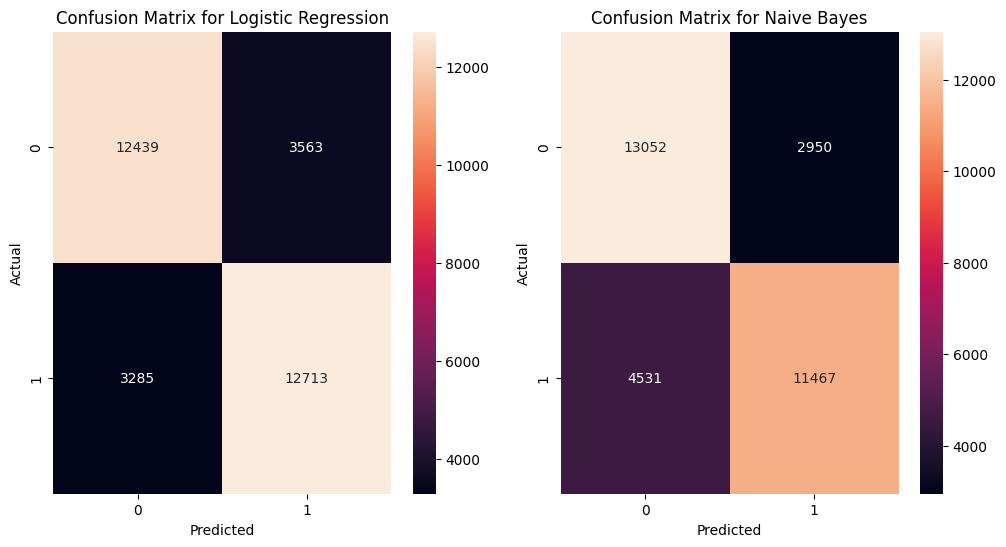

In [8]:
def plot_confusion_matrices(y_test, lr_y_pred, nb_y_pred):
    """Plot confusion matrices for Logistic Regression and Naive Bayes."""
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    lr_cm = confusion_matrix(y_test, lr_y_pred)
    sns.heatmap(lr_cm, annot=True, fmt='d', ax=ax[0])
    ax[0].set_title('Confusion Matrix for Logistic Regression')
    ax[0].set_xlabel('Predicted')
    ax[0].set_ylabel('Actual')

    nb_cm = confusion_matrix(y_test, nb_y_pred)
    sns.heatmap(nb_cm, annot=True, fmt='d', ax=ax[1])
    ax[1].set_title('Confusion Matrix for Naive Bayes')
    ax[1].set_xlabel('Predicted')
    ax[1].set_ylabel('Actual')

    plt.show()

plot_confusion_matrices(y_test, lr_y_pred, nb_y_pred)
